In this code we compute all the order parameters needed to see the Super-conducting state. 

In [1]:
import matplotlib.pyplot as plt
import torch
import numpy as np
from Common_codes import correlation_functions_file_20_3_25 as cff
# from Common_codes import evolution_video_creator as evc
from Common_codes import generic_codes_20_3_25 as gc    
from Common_codes import class_defn_file_20_3_25 as cdf
# from Common_codes import evolution_video_creator as evc
from Common_codes import hamiltonian_derivative_matrices_20_3_25 as hdm

We first need to initialise all the variables and import all the data from the data files.

Position space grid created
Momentum space grid created
 J_0 matrix created


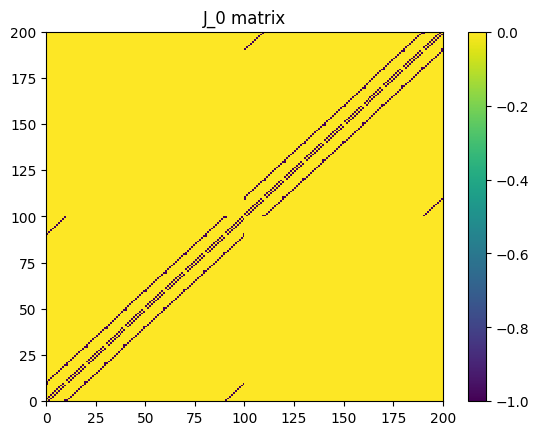

Completed extraction of matrices from the files


In [3]:
###########################################################
###########################################################
number_of_points = 10
positon_value_max = [10 , 10]
positon_value_min = [0  , 0]
position_space_grid = gc.coordinate_array_creator_function(positon_value_min,positon_value_max,number_of_points,True)
position_space_grid_tensor = torch.tensor(position_space_grid)

N_f = np.shape(position_space_grid)[0]
print("Position space grid created")

momentum_value_max = [np.pi/(positon_value_max[0]-positon_value_min[0])*number_of_points ,np.pi/(positon_value_max[1]-positon_value_min[1])*number_of_points]
momentum_value_min = [-np.pi/(positon_value_max[0]-positon_value_min[0])*number_of_points ,-np.pi/(positon_value_max[1]-positon_value_min[1])*number_of_points]
momentum_space_grid = gc.coordinate_array_creator_function(momentum_value_min,momentum_value_max,number_of_points,False)
momentum_space_grid_tensor = torch.tensor(momentum_space_grid)

N_b = np.shape(momentum_space_grid)[0]
print("Momentum space grid created")

boson_space_grid = gc.coordinate_array_creator_function(positon_value_min,positon_value_max,number_of_points,False)
boson_space_grid_tensor = torch.tensor(boson_space_grid)
fourier_transform_matrix = torch.tensor(gc.creating_fourier_matrix(momentum_space_grid,position_space_grid))

volume = np.prod(np.array(positon_value_max)-np.array(positon_value_min))

###########################################################
###########################################################

momentum_space_mesh = np.meshgrid(np.linspace(momentum_value_min[0],momentum_value_max[0],number_of_points,endpoint=False),np.linspace(momentum_value_min[1],momentum_value_max[1],number_of_points,endpoint=False))


###########################################################
###########################################################

J_0 = -1
J_0_matrix = gc.creating_J_0_matrix(position_space_grid,J_0,positon_value_max[0],spin_index=True)
J_0_tensor = torch.tensor(J_0_matrix,dtype=torch.complex128)

print(" J_0 matrix created")
plt.pcolormesh(J_0_matrix)
plt.title("J_0 matrix")
plt.colorbar()
plt.show()

# J_0_matrix = np.diag(np.ones(N_f)*J_0,1) + np.diag(np.ones(N_f)*J_0,-1)
omega_0 = 10*np.abs(J_0)
omega = 10*np.abs(J_0)*np.identity(N_b)
omega_tensor = torch.tensor(omega,dtype=torch.complex128)

# print("omega matrix created")

gamma_0 = 0.5*omega_0
gamma = gamma_0*np.append(np.identity(N_b),np.identity(N_b),axis = 1)
gamma_tensor = torch.tensor(gamma,dtype=torch.complex128)

chemical_potential_val = -5.1
###########################################################
###########################################################
# Extracting delta_r
# filename = "imag_time_evo_final_delta_r_mu_-4.5_t_25.npy"
# filename = "imag_time_evo_final_delta_r_mu_-5.1_t_95.npy"
# filename = "imag_time_evo_final_delta_r_sc_mu_-4_t=25.npy"
# filename = "imag_time_evo_final_delta_r_mu=-0p6_t=15.npy"
# filename = "imag_time_evo_final_delta_r_sc_mu_m5p3_t=25.npy"
# filename = "imag_time_evo_final_delta_r_sc_mu_m4p5_t=25.npy"
# filename = "delta_r_issue.npy"
filename= "real_time_evo_final_delta_r_mu_ini_-5.1_mu_final_-5.1_t_50.npy"
delta_r = torch.tensor(np.load(filename),dtype=torch.complex128)

# Extracting Gamma_b
# filename = "imag_time_evo_final_gamma_b_mu_-4.5_t_25.npy"
# filename = "imag_time_evo_final_gamma_b_mu_-5.1_t_95.npy"
# filename = "imag_time_evo_final_gamma_b_sc_mu_-4_t=25.npy"
# filename = "imag_time_evo_final_gamma_b_mu=-0p6_t=15.npy"
# filename = "imag_time_evo_final_gamma_b_sc_mu_m5p3_t=25.npy"
# filename = "imag_time_evo_final_gamma_b_sc_mu_m4p5_t=25.npy"
# filename = "Gamma_b_issue.npy"
filename= "real_time_evo_final_gamma_b_mu_ini_-5.1_mu_final_-5.1_t_50.npy"
Gamma_b = torch.tensor(np.load(filename),dtype=torch.complex128)

# Extracting Gamma_m
# filename = "imag_time_evo_final_gamma_m_sc_mu_m5p5_t=40.npy"
# filename = "imag_time_evo_final_gamma_m_sc_mu_-4_t=25.npy"
# filename = "imag_time_evo_final_gamma_m_mu=-0p6_t=15.npy"
# filename = "imag_time_evo_final_gamma_m_sc_mu_m5p3_t=25.npy"
# filename = "imag_time_evo_final_gamma_m_sc_mu_m4p5_t=25.npy"
# filename = "imag_time_evo_final_gamma_m_mu_-4.5_t_25.npy"
# filename = "imag_time_evo_final_gamma_m_mu_-5.1_t_95.npy"
filename= "real_time_evo_final_gamma_m_mu_ini_-5.1_mu_final_-5.1_t_50.npy"
# filename = "Gamma_m_issue.npy"
Gamma_m = torch.tensor(np.load(filename),dtype=torch.complex128)

# Extracting lambda_q 

# lmbda = np.reshape(np.load("imag_time_evo_final_lambda_sc_mu_m5p5_t=40.npy"),-1)
# lmbda = np.reshape(np.load("imag_time_evo_final_lambda_mu_-4.5_t_25.npy"),-1)
# lmbda = torch.tensor(np.load("imag_time_evo_final_lambda_mu_-5.1_t_95.npy"),dtype=torch.complex128)
# lmbda = np.reshape(np.load("imag_time_evo_final_lambda_sc_mu_-4_t=25.npy"),-1)
# lmbda = np.reshape(np.load("imag_time_evo_final_lambda_mu=-0p6_t=15.npy"),-1)
# lmbda = np.reshape(np.load("imag_time_evo_final_lambda_sc_mu_m5p3_t=25.npy"),-1)
# lmbda = np.reshape(np.load("imag_time_evo_final_lambda_sc_mu_m4p5_t=25.npy"),-1)
# lmbda = np.reshape(lmbda,(N_b,int(N_f/2)))
# lmbda = torch.tensor(np.load("lmbda_issue.npy"),dtype=torch.complex128)
lmbda = torch.tensor(np.load("real_time_evo_final_lambda_mu_ini_-5.1_mu_final_-5.1_t_50.npy"),dtype=torch.complex128)
###########################################################
###########################################################
# Initialising the initial input variables 

initial_input_variables = cdf.input_variables(position_space_grid_tensor,boson_space_grid_tensor,fourier_transform_matrix,lmbda,J_0_tensor,gamma_tensor,omega_tensor,chemical_potential_val)
# initial_input_variables.updating_lambda_bar_from_lambda(lmbda_q=lmbda,volume=N_b)  # Note that here we need to change the volume if we ever do. Else, it is N_b.
initial_input_variables.updating_lambda(lmbda)  # Note that here we need to change the volume if we ever do. Else, it is N_b.
###########################################################
###########################################################

computed_variables_instance = cdf.computed_variables(N_b,N_f)

# Computing the values for the computed_varaibles class
computed_variables_instance.initialize_all_variables(initial_input_variables,delta_r,Gamma_b)

###########################################################
###########################################################
fermionic_correlations = cff.correlation_functions(Gamma_m,N_f)


print("Completed extraction of matrices from the files")


/tmp/ipykernel_214032/1624740984.py:7: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  sc_order_parameter_fourier_space = 1/N_b*np.einsum('kn,km,nm -> k',fourier_transform_matrix[:,0:N_f_spinless],np.conj(fourier_transform_matrix[:,0:N_f_spinless]),sc_order_parameter_real_space[0:N_f_spinless,N_f_spinless:])


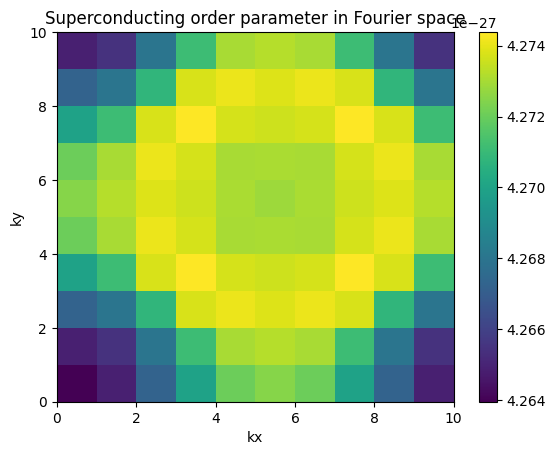

In [4]:
N_f_spinless = int(N_f/2)

sc_order_parameter_real_space = hdm.Delta_for_h_m(delta_r = delta_r,Gamma_b=Gamma_b, Gamma_m=Gamma_m,input_variables = initial_input_variables,
                                                  computed_variables= computed_variables_instance,correlation_matrices=fermionic_correlations)


sc_order_parameter_fourier_space = 1/N_b*np.einsum('kn,km,nm -> k',fourier_transform_matrix[:,0:N_f_spinless],np.conj(fourier_transform_matrix[:,0:N_f_spinless]),sc_order_parameter_real_space[0:N_f_spinless,N_f_spinless:])

# plt.pcolormesh(np.abs(np.reshape(sc_order_parameter_fourier_space, (10,10))) , vmin =0, vmax = 0.12)
plt.pcolormesh(np.abs(np.reshape(sc_order_parameter_fourier_space, (10,10))))
 
plt.colorbar()
plt.xlabel("kx")
plt.ylabel("ky")
plt.title("Superconducting order parameter in Fourier space")
plt.show()


/tmp/ipykernel_55741/77799694.py:1: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  sc_order_parameter_fourier_space_2D = 1/N_b*np.einsum('kn,lm,nm -> kl',fourier_transform_matrix[:,0:N_f_spinless],np.conj(fourier_transform_matrix[:,0:N_f_spinless]),sc_order_parameter_real_space[0:N_f_spinless,N_f_spinless:])


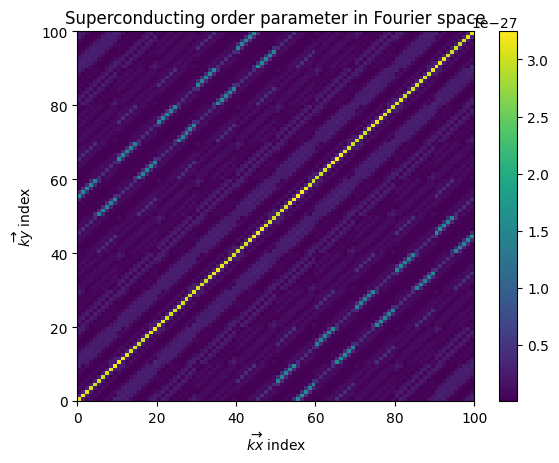

In [18]:
sc_order_parameter_fourier_space_2D = 1/N_b*np.einsum('kn,lm,nm -> kl',fourier_transform_matrix[:,0:N_f_spinless],np.conj(fourier_transform_matrix[:,0:N_f_spinless]),sc_order_parameter_real_space[0:N_f_spinless,N_f_spinless:])

plt.pcolormesh(np.abs(sc_order_parameter_fourier_space_2D) )
plt.title("Superconducting order parameter in Fourier space")
plt.xlabel(r"$\overrightarrow{kx} $ index")
plt.ylabel(r"$\overrightarrow{ky} $ index")
plt.colorbar()
plt.show()

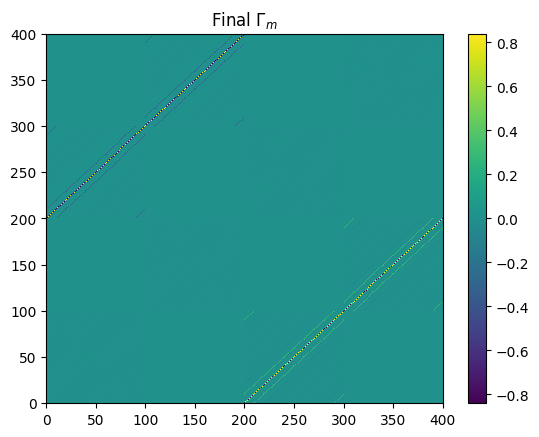

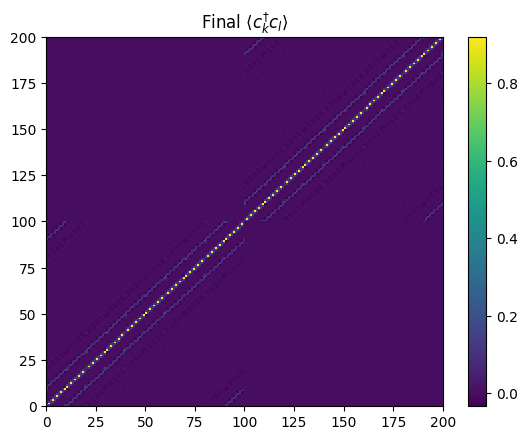

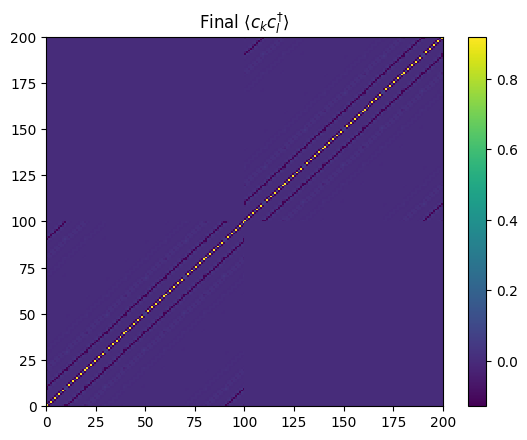

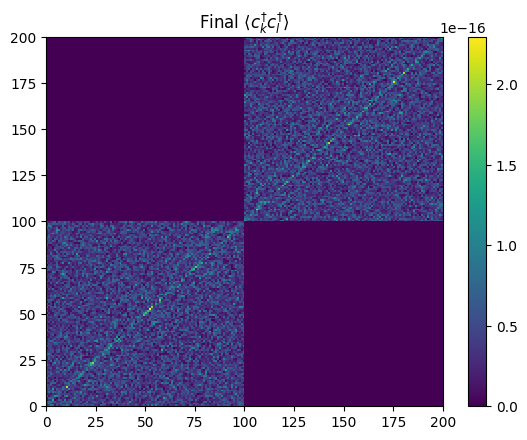

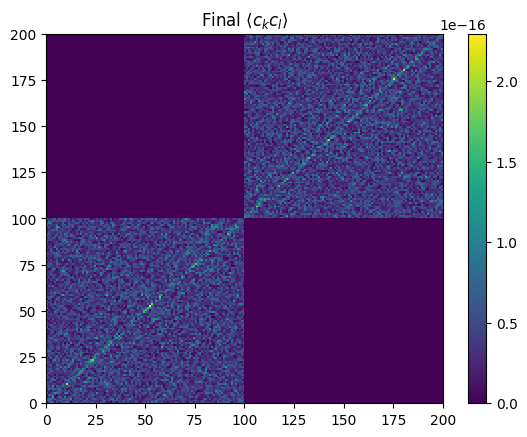

$\sum_{i,\uparrow} c^{\dagger}_{i,\uparrow} c_{i,\uparrow}$: (0.49999999999999795+2.7646633242135422e-17j)
$\sum_{i,\uparrow} c^{\dagger}_{i,\uparrow} c_{i,\uparrow}$: (0.4999999999999979-3.459733938991842e-18j)


In [5]:
plt.pcolormesh(torch.real(Gamma_m)) 
plt.title(r"Final $\Gamma_{m}$")
plt.colorbar()
plt.show()

c_dagger_c_data = fermionic_correlations.c_dagger_c_mat
c_c_dagger_data = fermionic_correlations.c_c_dagger_mat
c_c_data = fermionic_correlations.c_c_mat
c_dagger_c_dagger_data = fermionic_correlations.c_dagger_c_dagger_mat


plt.pcolormesh(np.real(c_dagger_c_data.numpy())) 
plt.title(r"Final $\langle c^{\dagger}_{k} c_{l} \rangle$")
plt.colorbar()
plt.show()

plt.pcolormesh(np.real(c_c_dagger_data.numpy())) 
plt.title(r"Final $\langle c_{k} c^{\dagger}_{l} \rangle$")
plt.colorbar()
plt.show()

plt.pcolormesh(np.abs(c_dagger_c_dagger_data.numpy())) 
plt.title(r"Final $\langle c^{\dagger}_{k}  c^{\dagger}_{l} \rangle$")
plt.colorbar()
plt.show()


plt.pcolormesh(np.abs(c_c_data.numpy())) 
plt.title(r"Final $\langle c_{k} c_{l}\rangle$")
plt.colorbar()
plt.show()


print(r"$\sum_{i,\uparrow} c^{\dagger}_{i,\uparrow} c_{i,\uparrow}$:",np.sum(np.diag(c_dagger_c_data)[0:int(N_f/2)])/(N_f/2))
print(r"$\sum_{i,\uparrow} c^{\dagger}_{i,\uparrow} c_{i,\uparrow}$:",np.sum(np.diag(c_dagger_c_data)[int(N_f/2):])/(N_f/2))

Density of electrons
$\sum_{i,\uparrow} c^{\dagger}_{i,\uparrow} c_{i,\uparrow}$: 0.49999999999999795
$\sum_{i,\uparrow} c^{\dagger}_{i,\uparrow} c_{i,\uparrow}$: 0.4999999999999979


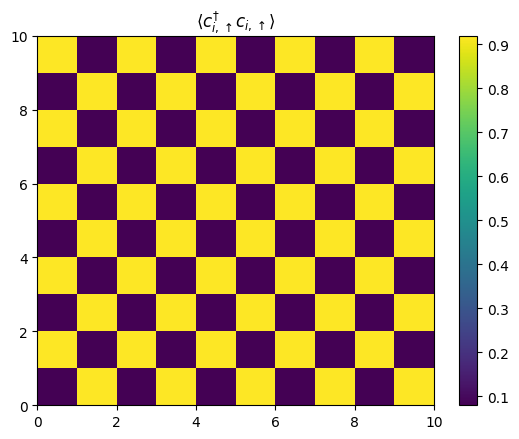

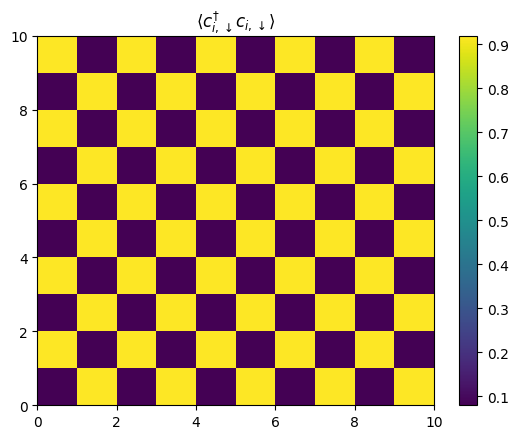

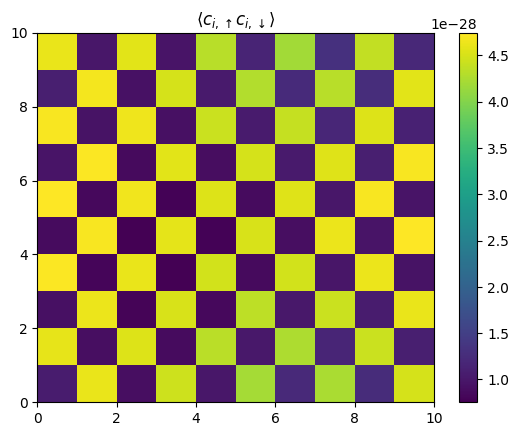

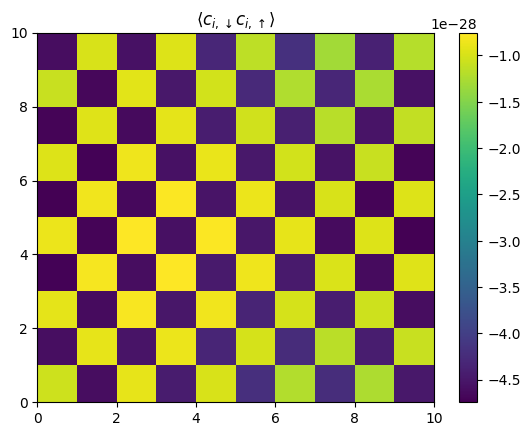

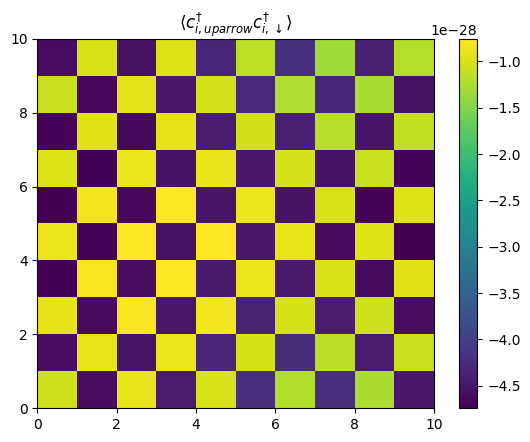

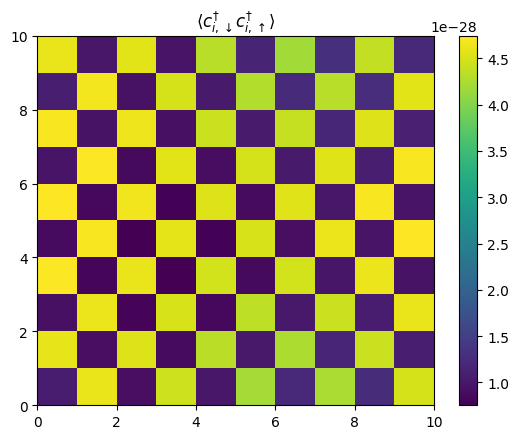

In [6]:
c_dagger_c_data = fermionic_correlations.c_dagger_c_mat
c_c_dagger_data = fermionic_correlations.c_c_dagger_mat
c_c_data = fermionic_correlations.c_c_mat
c_dagger_c_dagger_data = fermionic_correlations.c_dagger_c_dagger_mat

print("Density of electrons")
print(r"$\sum_{i,\uparrow} c^{\dagger}_{i,\uparrow} c_{i,\uparrow}$:", np.real( np.sum(np.diag(c_dagger_c_data)[0:int(N_f/2)])/( N_f/2 ) ) )
print(r"$\sum_{i,\uparrow} c^{\dagger}_{i,\uparrow} c_{i,\uparrow}$:", np.real( np.sum(np.diag(c_dagger_c_data)[int(N_f/2):])/(  N_f/2 ) ) )

plt.pcolormesh(np.real(np.reshape(np.diag(c_dagger_c_data[0:int(N_f/2),0:int(N_f/2)]),(10,10) ) ) )
plt.colorbar()
plt.title(r"$\langle c^{\dagger}_{i,\uparrow} c_{i,\uparrow} \rangle$")
plt.show()

plt.pcolormesh(np.real(np.reshape(np.diag(c_dagger_c_data[int(N_f/2):,int(N_f/2):]),(10,10) ) ) )
plt.colorbar()
plt.title(r"$\langle c^{\dagger}_{i,\downarrow} c_{i,\downarrow} \rangle$")
plt.show()

plt.pcolormesh(np.real(np.reshape(np.diag(c_c_data[0:int(N_f/2),int(N_f/2):]),(10,10) ) ) )
plt.colorbar()
plt.title(r"$\langle c_{i,\uparrow} c_{i,\downarrow} \rangle$")
plt.show()

plt.pcolormesh(np.real(np.reshape(np.diag(c_c_data[int(N_f/2):,0:int(N_f/2)]),(10,10) ) ) )
plt.colorbar()
plt.title(r"$\langle c_{i,\downarrow} c_{i,\uparrow} \rangle$")
plt.show()

plt.pcolormesh(np.real(np.reshape(np.diag(c_dagger_c_dagger_data[0:int(N_f/2),int(N_f/2):]),(10,10) ) ) )
plt.colorbar()
plt.title(r"$\langle c^{\dagger}_{i,uparrow} c^{\dagger}_{i,\downarrow} \rangle$")
plt.show()

plt.pcolormesh(np.real(np.reshape(np.diag(c_dagger_c_dagger_data[int(N_f/2):,0:int(N_f/2)]),(10,10) ) ) )
plt.colorbar()
plt.title(r"$\langle c^{\dagger}_{i,\downarrow} c^{\dagger}_{i,\uparrow} \rangle$")
plt.show()

/home/palan/Yash/yash_env/lib/python3.12/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/palan/Yash/yash_env/lib/python3.12/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


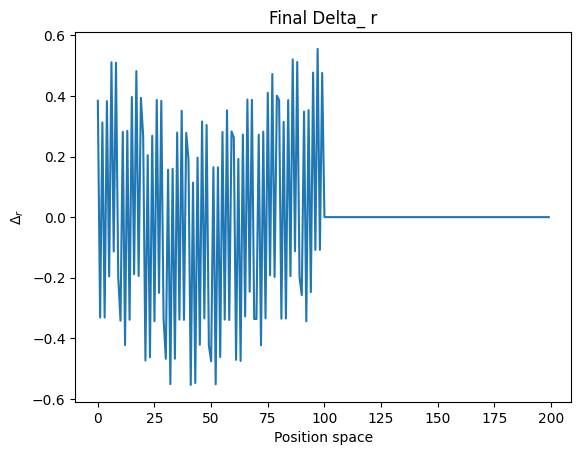

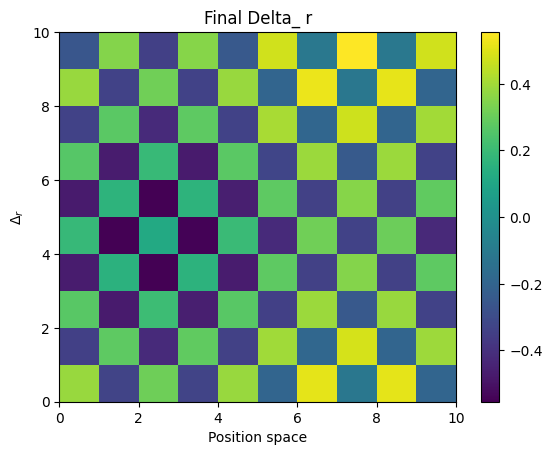

In [7]:
plt.plot(delta_r)
# plt.ylim(-1,1)
# plt.ylim(-1,0)
plt.xlabel("Position space")
plt.ylabel(r"$\Delta_r$")
plt.title("Final Delta_ r")
plt.show()

plt.pcolormesh(np.reshape(delta_r[0:N_b].real,(10,10)))
# plt.ylim(-1,1)
plt.colorbar()
plt.xlabel("Position space")
plt.ylabel(r"$\Delta_r$")
plt.title("Final Delta_ r")
plt.show()


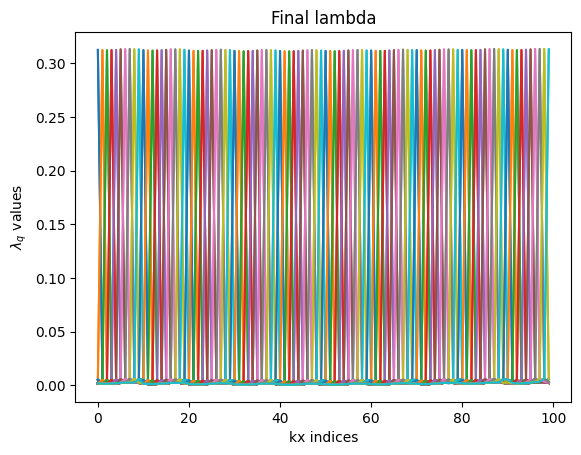

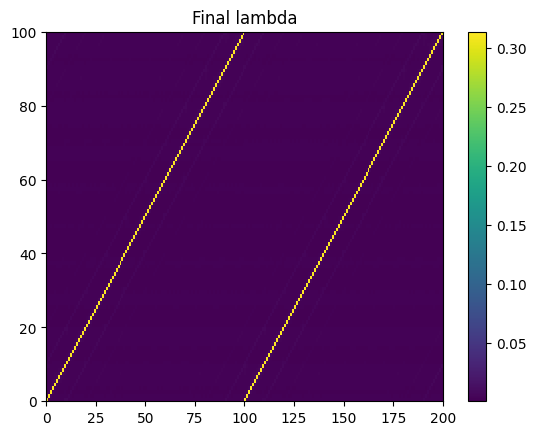

In [8]:
plt.plot(lmbda)
# plt.ylim(0,1)
plt.title("Final lambda")
plt.xlabel("kx indices")
plt.ylabel(r"$\lambda_q$ values")
plt.show()

plt.pcolormesh(np.real(lmbda))
plt.colorbar()
plt.title("Final lambda")
plt.show()

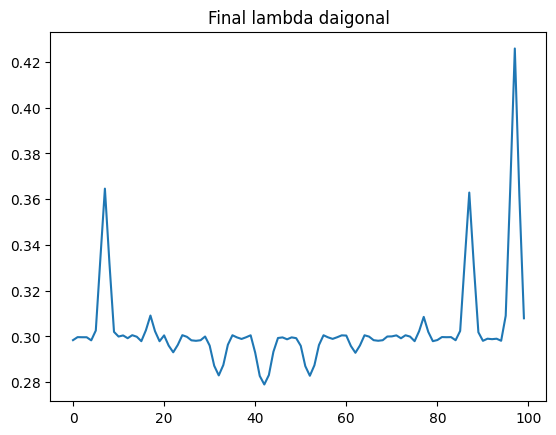

In [23]:
plt.plot(torch.diag(lmbda[:,0:N_b]))
plt.title("Final lambda daigonal")
plt.show()

/tmp/ipykernel_55741/3783786246.py:1: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  new_lmbda = torch.diag(1/(N_b)*torch.einsum('km,qn,nm->qk',initial_input_variables.fourier_array[0:N_b,0:N_b],np.conj(initial_input_variables.fourier_array[0:N_b,0:N_b]),lmbda[0:N_b,0:N_b]))


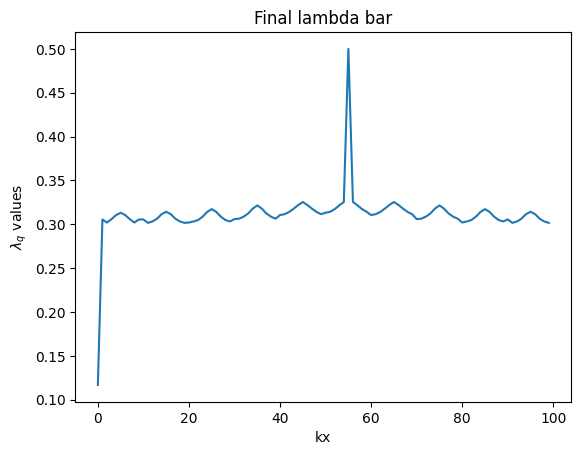

In [10]:
new_lmbda = torch.diag(1/(N_b)*torch.einsum('km,qn,nm->qk',initial_input_variables.fourier_array[0:N_b,0:N_b],np.conj(initial_input_variables.fourier_array[0:N_b,0:N_b]),lmbda[0:N_b,0:N_b]))

plt.plot(torch.abs(new_lmbda).numpy().real)
plt.title("Final lambda bar")
plt.xlabel("kx")
plt.ylabel(r"$\lambda_q$ values")
# save_file_name = "lmbda_q_mu_"+str(chemical_potential_val)+".pdf"
# plt.savefig(save_file_name)
plt.show()

/tmp/ipykernel_55741/2249185447.py:1: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  Gamma_b_fourier_space_x_x = 1/N_b*np.einsum('kn,km,nm -> k',fourier_transform_matrix[:,0:N_b],np.conj(fourier_transform_matrix[:,0:N_b]),Gamma_b[0:N_b,0:N_b])
/tmp/ipykernel_55741/2249185447.py:2: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  Gamma_b_fourier_space_x_p = 1/N_b*np.einsum('kn,km,nm -> k',fourier_transform_matrix[:,0:N_b],np.conj(fourier_transform_matrix[:,0:N_b]),Gamma_b[0:N_b,N_b:])
/tmp/ipykernel_55741/2249185447.py:3: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  Gamma_b_fourier_space_p_x = 1/N_b*np.einsum('kn,km,nm -> k',fourier_transform_matrix[:,0:N_b],np.conj(fourier_transform_matrix[:,0:N_b]),Gamma_b[N_b:,0:N_b

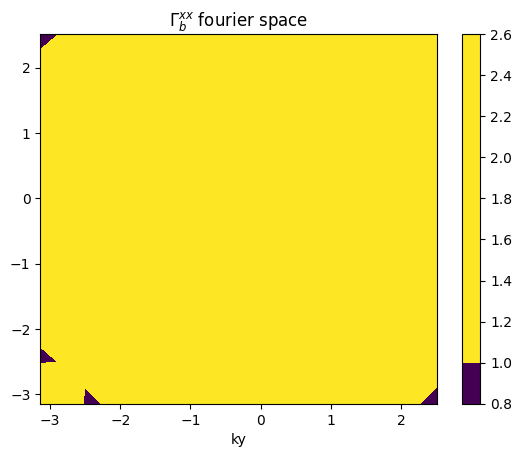

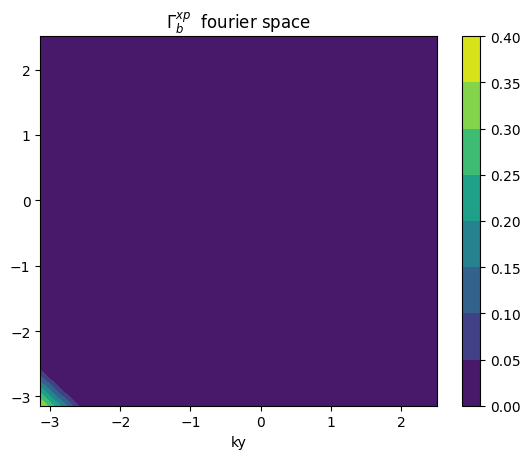

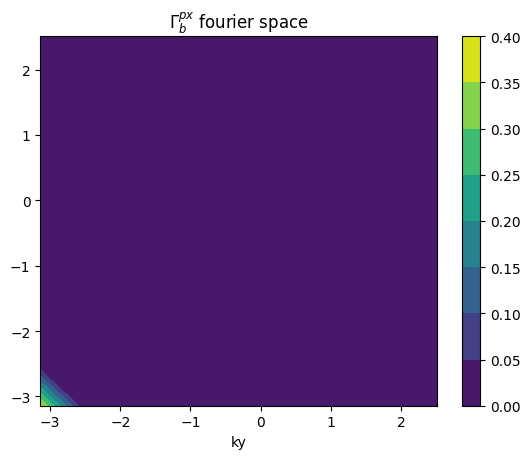

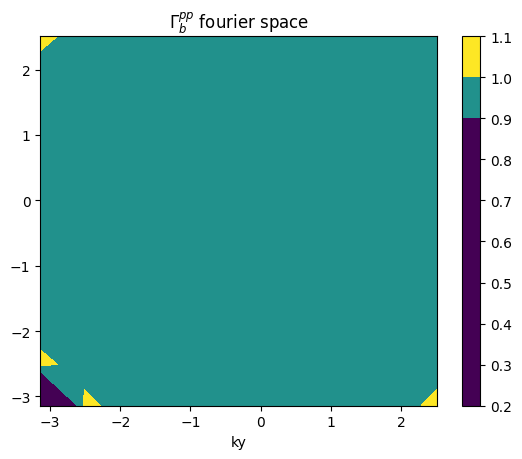

In [11]:
Gamma_b_fourier_space_x_x = 1/N_b*np.einsum('kn,km,nm -> k',fourier_transform_matrix[:,0:N_b],np.conj(fourier_transform_matrix[:,0:N_b]),Gamma_b[0:N_b,0:N_b]) 
Gamma_b_fourier_space_x_p = 1/N_b*np.einsum('kn,km,nm -> k',fourier_transform_matrix[:,0:N_b],np.conj(fourier_transform_matrix[:,0:N_b]),Gamma_b[0:N_b,N_b:]) 
Gamma_b_fourier_space_p_x = 1/N_b*np.einsum('kn,km,nm -> k',fourier_transform_matrix[:,0:N_b],np.conj(fourier_transform_matrix[:,0:N_b]),Gamma_b[N_b:,0:N_b]) 
Gamma_b_fourier_space_p_p = 1/N_b*np.einsum('kn,km,nm -> k',fourier_transform_matrix[:,0:N_b],np.conj(fourier_transform_matrix[:,0:N_b]),Gamma_b[N_b:,N_b:]) 

# plt.pcolormesh(np.reshape(np.real(Gamma_b_fourier_space_x_x), (10,10)) )
# plt.colorbar()
# plt.show()

# plt.pcolormesh(np.reshape(np.real(Gamma_b_fourier_space_x_p), (10,10)) )
# plt.colorbar()
# plt.show()

# plt.pcolormesh(np.reshape(np.real(Gamma_b_fourier_space_p_x), (10,10)) )
# plt.colorbar()
# plt.show()

# plt.pcolormesh(np.reshape(np.real(Gamma_b_fourier_space_p_p), (10,10)) )
# plt.colorbar()
# plt.show()
# X,Y = np.meshgrid( np.linspace(momentum_value_min[0],momentum_value_max[0],number_of_points,endpoint=False) ,
#                   np.linspace(momentum_value_min[1],momentum_value_max[1],number_of_points,endpoint=False) )

X = np.linspace(momentum_value_min[0],momentum_value_max[0],number_of_points,endpoint=False)
Y = np.linspace(momentum_value_min[1],momentum_value_max[1],number_of_points,endpoint=False)

# plt.contourf([X,Y], Z=np.reshape(np.real(Gamma_b_fourier_space_x_x), (10,10)) , cmap = 'viridis', vmin = 1,vmax = 1.05)
plt.contourf(X,Y,np.reshape(np.abs(Gamma_b_fourier_space_x_x), (10,10)) , cmap = 'viridis', vmin = 1,vmax = 1.05)
plt.colorbar()
# plt.clim(1,1.5)
plt.title(r"$\Gamma^{xx}_b$ fourier space")
plt.xlabel("kx")
plt.xlabel("ky")
plt.show()

plt.contourf(X,Y,np.reshape(np.abs(Gamma_b_fourier_space_x_p), (10,10)) )
plt.colorbar()
plt.title(r"$\Gamma^{xp}_b$  fourier space")
plt.xlabel("kx")
plt.xlabel("ky")
plt.show()

plt.contourf(X,Y,np.reshape(np.abs(Gamma_b_fourier_space_p_x), (10,10)) )
plt.colorbar()
plt.title(r"$\Gamma^{px}_b$ fourier space")
plt.xlabel("kx")
plt.xlabel("ky")
plt.show()

plt.contourf(X,Y,np.reshape(np.abs(Gamma_b_fourier_space_p_p), (10,10)) , cmap = 'viridis', vmin = 0.9,vmax = 1)
plt.colorbar()
plt.xlabel("kx")
plt.xlabel("ky")
plt.title(r"$\Gamma^{pp}_b$ fourier space")

# plt.clim(1,1.5)
plt.show()


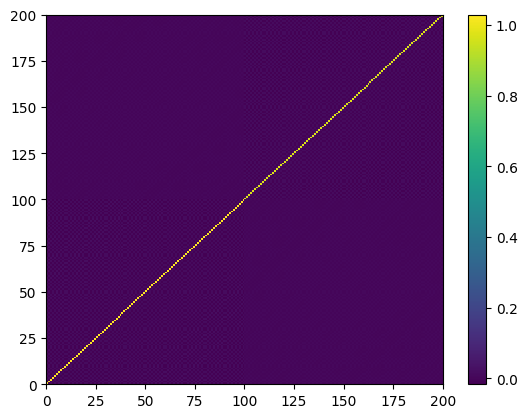

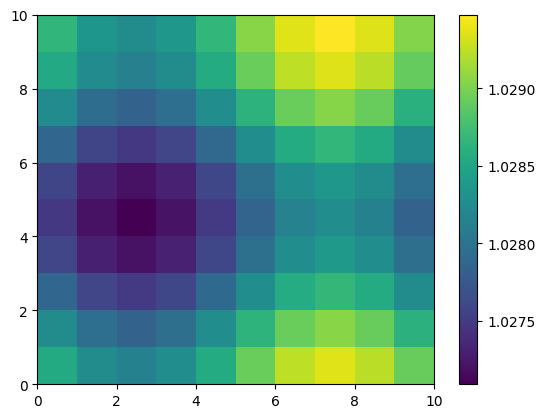

In [15]:
plt.pcolormesh(Gamma_b.real)
plt.colorbar()
plt.show()

plt.pcolormesh(np.reshape(np.diag(Gamma_b[0:100,0:100].real),(10,10)))
plt.colorbar()
plt.show()

In [4]:
np.diag(Gamma_b)

array([1.02822958, 1.02822975, 1.02823023, 1.02823035, 1.02822996,
       1.02822964, 1.02822987, 1.02823037, 1.02823046, 1.02822999,
       1.02822982, 1.02823002, 1.02823052, 1.0282306 , 1.02823016,
       1.02822981, 1.02823005, 1.02823057, 1.02823067, 1.02823021,
       1.02822937, 1.02822962, 1.02823017, 1.02823027, 1.0282298 ,
       1.0282294 , 1.02822963, 1.02823015, 1.02823024, 1.02822976,
       1.02822882, 1.02822908, 1.02822968, 1.02822983, 1.02822936,
       1.02822895, 1.02822916, 1.02822967, 1.02822975, 1.02822924,
       1.02822891, 1.02822913, 1.02822973, 1.02822992, 1.02822948,
       1.02822905, 1.02822925, 1.02822978, 1.02822988, 1.02822936,
       1.02822951, 1.02822969, 1.02823027, 1.02823046, 1.02823002,
       1.02822958, 1.02822975, 1.02823029, 1.02823044, 1.02822997,
       1.02822982, 1.02823   , 1.02823054, 1.02823072, 1.02823028,
       1.02822982, 1.02822995, 1.02823048, 1.02823066, 1.02823025,
       1.02822945, 1.02822963, 1.02823018, 1.02823036, 1.02822